In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix,r2_score
from sklearn import preprocessing

In [2]:
df = pd.read_csv('preprocessed_total_0529.csv')
pd.set_option("display.max_columns", None)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90804 entries, 0 to 90803
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_url        90804 non-null  int64  
 1   car_area       90804 non-null  object 
 2   car_no         90804 non-null  object 
 3   car_brand      90804 non-null  object 
 4   nation         90804 non-null  object 
 5   car_name       90804 non-null  object 
 6   name_datailed  90804 non-null  object 
 7   new_price      90804 non-null  int64  
 8   price          90804 non-null  int64  
 9   year           90804 non-null  int64  
 10  use            90804 non-null  int64  
 11  depreciation   90804 non-null  int64  
 12  mileage        90804 non-null  int64  
 13  fuel           90804 non-null  object 
 14  forecast_min   90804 non-null  int64  
 15  forecast_max   90804 non-null  int64  
 16  car_type       90804 non-null  object 
 17  car_cc         90804 non-null  int64  
 18  color 

In [12]:
len(df['sales_corp'].unique())

2757

In [38]:
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
from matplotlib import font_manager

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# 색상 함축시키는 방법 

In [13]:
print(len(df3.color.unique()))
print(df3.color.unique())

338
['인기색상' '회색' '흰색' '검정' '검정색' '은색' '쥐색' '분홍' '초록' '빨강색' '다크그레이' '블루펄' '자주색'
 '노랑' '노랑색' '진주색' '초록색' '검쥐색' '파랑' '파랑색' '비둘기' '빨강' '갈색' '청색' '보라색' '하늘색'
 '베이지' '밤색' '핑크색' '파랑(남색 곤색)' '분홍색' '빨간색' '녹색' '진주' '은하색' '연회색' '다크블루'
 '연갈대색' '명은색' '아메시스트블랙' '하늘' '검정투톤' '주황색' '슬릭실버' '보라' '어반그레이' '은회색'
 '아메시스트 블랙' '진주펄색' '클라우드펄' '펄흰색' '백진주' '샌드그레이' '메탈릭 블랙' '청옥색' '클라우드 펄'
 '쥐색투톤' '베이지투톤' '미색' '쥐회색' '담녹색' '갈대투톤' '빨강투톤' '빨강(주홍)' '그레이' '티타늄실버'
 '아이보리' '감청' '금색' '흑자주' '울트라실버' 'Neo블랙' '흰색투톤' '갈대색' '감은' '갈색(밤색)'
 '삿포로화이트' '미선택' '남색' '곤색' '다크체리' '댄디블루' '브라운' '진청색' '댄디블루투톤' '아틀란티블루'
 '청색투톤' '은색투톤' '진주투톤' '담녹' '플라밍 레드' '마블그레이' '비둘기색' '진청' '자주' '다크브라운'
 '댄디블루화이트루프' '흑장미' '파랑(남색)' '진녹' '네이비' '흰색(미색)' '은비투톤' '진남색' '오렌지색' '베이지색'
 '진갈색' '카본블랙' '초록(연두)' '민트색' '연베이지' '핑크' '목련색' '연녹색' '버건디레드' '어두운 밤색'
 '커피색' '그라파이트' 'Selenite Grey' 'Graphite grey' '엠버브라운색상' '스틸 그레이' '가드메탈릭'
 '페퍼화이트' '허리케인 그레이(남색)' '메디터레니언 블루' '샌드베이지' '진한 담녹색' '임페리얼 블루' '청록'
 '아틱레이스블루' '버니나그레이' '로얄버건디' '소피스토그레이' '연두' '민트' '에스토릴블루' '로얄블루' '베이지랩핑'
 '

In [14]:
color_uniq_val = df3['color'].unique()
val_freq = []

for uniq_val in color_uniq_val:
    val_freq.append(len(df3[df3['color']== uniq_val]))
    

In [15]:
frequency = sorted(zip(color_uniq_val,val_freq),key=lambda x: x[1],reverse=True)

In [16]:
frequency

[('흰색', 28376),
 ('검정색', 14928),
 ('회색', 12501),
 ('은색', 7532),
 ('인기색상', 6702),
 ('검정', 4783),
 ('파랑색', 2385),
 ('진주색', 2375),
 ('쥐색', 1967),
 ('초록색', 1651),
 ('빨강색', 1190),
 ('파랑', 837),
 ('청색', 659),
 ('노랑색', 591),
 ('노랑', 564),
 ('갈색', 528),
 ('다크그레이', 471),
 ('빨강', 377),
 ('미색', 177),
 ('진주', 153),
 ('다크블루', 153),
 ('주황색', 118),
 ('베이지', 84),
 ('파랑(남색 곤색)', 83),
 ('하늘색', 81),
 ('보라색', 69),
 ('빨간색', 63),
 ('초록', 59),
 ('남색', 59),
 ('은회색', 57),
 ('빨강(주홍)', 53),
 ('블루펄', 49),
 ('하늘', 39),
 ('흰색투톤', 33),
 ('검정투톤', 29),
 ('자주색', 27),
 ('분홍색', 27),
 ('갈색(밤색)', 26),
 ('노란색', 24),
 ('갈대색', 23),
 ('은색투톤', 23),
 ('파랑(남색)', 22),
 ('연금색', 22),
 ('곤색', 21),
 ('밤색', 20),
 ('녹색', 20),
 ('민트', 20),
 ('감청', 19),
 ('Neo블랙', 17),
 ('초록(연두)', 17),
 ('명은색', 16),
 ('민트색', 16),
 ('자주', 15),
 ('진청색', 14),
 ('카본블랙', 14),
 ('분홍', 13),
 ('브라운', 13),
 ('은하색', 12),
 ('진청', 12),
 ('백진주', 10),
 ('청옥색', 10),
 ('감은', 10),
 ('베이지색', 10),
 ('군청색', 10),
 ('진회색', 10),
 ('검쥐색', 8),
 ('빨강투톤', 8),
 ('티타늄실버', 8),
 ('금색',

# 국산 수입으로 브랜드 국산/ 수입으로 함축

In [17]:
df3.car_brand.unique()

array(['한국GM', '르노삼성', '르노코리아', '쌍용', '폭스바겐', '닛산', '지프', '미니', '푸조',
       '도요타', '마세라티', '혼다', '캐딜락', '렉서스', '랜드로버', '포르쉐', '포드', '재규어',
       '인피니티', '볼보', '링컨', '크라이슬러', '쉐보레', '시트로엥', '벤틀리', '피아트', '애스턴마틴',
       '닷지', '페라리', '테슬라', '제네시스', 'BMW', '다이하쓰', '로버', '사브', '벤츠', 'MAN',
       '아우디', '허머', '스즈키', '롤스로이스', '맥라렌', '어큐라', '스바루', '동풍자동차', '스마트',
       '미쯔비시', '람보르기니', 'GMC', '마쯔다', '중한자동차', '이베코', '마이바흐', '포톤',
       '선롱버스', '현대', '기아'], dtype=object)

In [18]:
df3.car_brand[0]

'한국GM'

In [19]:
df3.head(2)

,car_url,car_area,car_no,car_brand,car_name,name_datailed,new_price,price,year,use,depreciation,mileage,fuel,forecast_min,forecast_max,car_type,car_cc,color,trans,loss,flood,usage,change,insurance,sales_corp,sales_loca,lat,lng,options,options_count
0,22274652,경기,29너6142,한국GM,쉐보레 올란도,LPG LS 일반형,2122,849,2013,103,60,131493,LPG,535,750,RV,0,인기색상,오토,없음,없음,없음,1,있음,주식회사 노빌리티 경기지점,경기 수원시,37.263332,127.028747,[],0
1,22274154,광주,156서1980,한국GM,더 뉴 트랙스,1.6 디젤 LT 기본형,1986,1450,2018,52,27,60000,디젤,1104,1533,SUV,1598,회색,오토,없음,없음,있음,2,없음,주식회사 즐거운모터스,광주 서구,35.152140,126.890056,"['주차감지센서', '가죽시트', '열선시트', '사이드커튼에어백', '전동접이사이...",7


In [20]:
df3.insert(4,'nation','')

In [ ]:
domestic_car= ['현대','기아','한국GM','쌍용','르노코리아','르노삼성','제네시스']
imported_car = []

for i in range(len(df3)):
    
    if df3.car_brand[i] in domestic_car:
        df3.nation[i] = '국산'
    else :
        df3.nation[i] = '수입'
    

C:\Users\ksy94\AppData\Local\Temp/ipykernel_17568/1671608584.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.nation[i] = '국산'
C:\Users\ksy94\AppData\Local\Temp/ipykernel_17568/1671608584.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.nation[i] = '수입'


In [ ]:
df3.nation.unique()

In [ ]:
df3[df3.nation == '국산'].describe()

In [ ]:
df3[df3.nation != '국산'].describe()

In [ ]:
df3[df3.depreciation == 99]

In [24]:
df3[df3.nation == '국산'].describe(include = "O")

,car_area,car_no,car_brand,nation,car_name,name_datailed,fuel,car_type,color,trans,loss,flood,usage,insurance,sales_corp,sales_loca,options
count,43332,43332,43332,43332,43332,43332,43332,43332,43332,43332,43332,43332,43332,43332,43332,43332,43332
unique,16,43332,6,1,283,2621,9,12,196,5,3,3,3,3,2540,151,3016
top,경기,29너6142,현대,국산,포터2,LT 기본형,가솔린,SUV,흰색,오토,없음,없음,없음,있음,코리아모터스,경기 수원시,[]
freq,18951,1,21684,43332,2803,511,21466,9927,13571,38613,43102,43319,33816,30813,338,9432,6554


In [25]:
df3[df3.nation != '국산'].describe(include = 'O')

,car_area,car_no,car_brand,nation,car_name,name_datailed,fuel,car_type,color,trans,loss,flood,usage,insurance,sales_corp,sales_loca,options
count,22598,22598,22598,22598,22598,22598,22598,22598,22598,22598,22598,22598,22598,22598,22598,22598,22598
unique,16,22598,50,1,573,2520,9,12,170,5,3,3,3,3,1899,134,1760
top,경기,06라1897,벤츠,수입,E클래스 (W213),520d F10(10~16년),디젤,중형,흰색,오토,없음,없음,없음,있음,코리아모터스,경기 수원시,"['썬루프', '내비게이션', '스마트키', '오토라이트', '주차감지센서', '가..."
freq,14034,1,5233,22598,1164,247,11126,6419,7469,22300,22199,22588,21192,17682,523,8686,3167


# 분석 시각화 추가

In [26]:
df3.car_area.unique()

array(['경기', '광주', '부산', '대전', '전북', '경남', '전남', '서울', '인천', '경북', '대구',
       '충남', '강원', '충북', '울산', '제주'], dtype=object)

In [27]:
from matplotlib import font_manager, rc

font_path = 'C:\Windows\Fonts/HMFMMUEX.TTC'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)

In [28]:
df_bar = df.groupby(['car_type','nation']).size().unstack()

In [29]:
df_bar

nation,국산,수입
car_type,,
RV,4054,99
SUV,16163,5886
경차,7435,25
대형,12007,3623
버스,159,4
소형,1082,1816
스포츠카,225,1148
승합,2032,84
준중형,7305,3419


<Figure size 1800x1080 with 0 Axes>

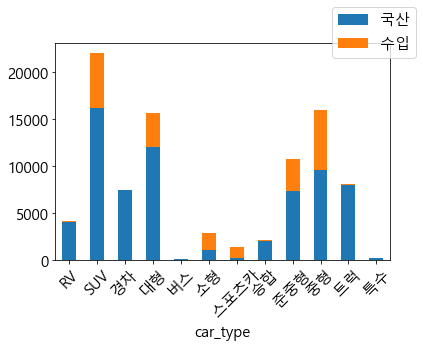

In [45]:
plt.figure(figsize = (25,15))
df_bar.plot(kind='bar', stacked = True)
plt.legend(bbox_to_anchor=(1.1,1.2))
plt.xticks(rotation=45)
plt.rc('font', size = 10)
plt.show()

In [31]:
df_scat = df[['depreciation','mileage']]

In [32]:
df_scat.corr()

,depreciation,mileage
depreciation,1.000000,0.585833
mileage,0.585833,1.000000


In [33]:
df_scat.mileage.max()

1369350

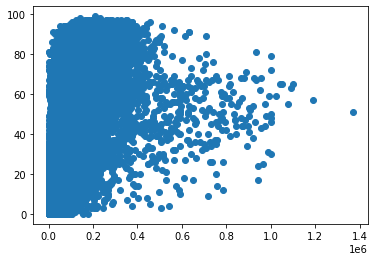

In [34]:
x = df_scat['mileage']
y = df_scat['depreciation']
plt.plot(x, y , 'o')
plt.show()

In [35]:
x = df[df.mileage >= 100000]

In [36]:
x = x[['mileage','depreciation']]

In [37]:
x.corr()

,mileage,depreciation
mileage,1.000000,0.182121
depreciation,0.182121,1.000000


- 트럭같은 경우는 운송업을 하는 경우가 있어서 주행거리보다 연식이 중요한듯 하다

In [38]:
df_truck = df3[df3.car_type == '트럭']

In [39]:
df_truck

,car_url,car_area,car_no,car_brand,nation,car_name,name_datailed,new_price,price,year,use,depreciation,mileage,fuel,forecast_min,forecast_max,car_type,car_cc,color,trans,loss,flood,usage,change,insurance,sales_corp,sales_loca,lat,lng,options,options_count
9,22261671,경기,경기91바3367,한국GM,국산,대우트럭,카고,9777,8800,2018,60,10,266862,디젤,4265,4628,트럭,0,검정색,오토,없음,없음,있음,0,없음,(합자)경동자동차매매상사,경기도 평택시,36.992497,127.112717,[],0
72,22176965,경기,84다0321,한국GM,국산,리얼 뉴 콜로라도,3.6L V6 4WD Z71-X,4587,4450,2021,16,3,13147,가솔린,4012,4315,트럭,0,회색,오토,없음,없음,없음,1,없음,(주)오토앤오토,경기 김포시,37.615461,126.715789,"['오토라이트', '주차감지센서', '열선시트', '사이드커튼에어백', '타이어공기...",7
136,22117168,광주,90마4162,한국GM,국산,콜로라도,3.6L V6 4WD 익스트림-X 사이드 레일,4392,3690,2020,24,16,20700,가솔린,3600,3894,트럭,3649,검정,오토,없음,없음,없음,1,없음,기아모터스 주식회사,광주광역시 서구,35.152140,126.890056,"['오토라이트', '열선시트', '사이드커튼에어백', '전동접이사이드미러', '타이...",6
231,21950017,경기,97소0817,한국GM,국산,콜로라도,3.6L V6 4WD 익스트림-X,4250,3740,2020,22,12,26920,가솔린,3434,3711,트럭,0,검정,오토,없음,없음,없음,1,없음,(주)오토앤오토,경기 김포시,37.615461,126.715789,"['오토라이트', '열선시트', '사이드커튼에어백', '전동접이사이드미러', '타이...",6
253,21868576,부산,83너8270,한국GM,국산,뉴 라보,내장탑차 롱카고,783,650,2016,68,17,24921,LPG,396,566,트럭,0,흰색,오토,없음,없음,없음,1,없음,뉴에스케이상사(주),부산광역시 해운대구,35.162900,129.163800,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65914,11217343,경기,86로3583,현대,국산,포터2,초장축 슈퍼캡 CRDi DLX 기본형,1455,1310,2015,91,10,3189,디젤,1066,1477,트럭,0,흰색,오토,없음,없음,없음,0,없음,용카,경기 수원시,37.263332,127.028747,[],0
65917,11216013,경기,82소3779,현대,국산,포터2,기타,1400,630,2012,129,55,201588,디젤,500,691,트럭,0,흰색,수동,없음,없음,없음,5,있음,수원트럭,경기도 수원시,37.263332,127.028747,"['가죽시트', '열선시트']",2
65922,11199951,부산,부산91자3851,현대,국산,포터2,초장축 슈퍼캡 CRDi DLX 기본형,2378,880,2015,94,63,114465,디젤,711,980,트럭,0,흰색,수동,없음,없음,있음,4,없음,태양모터스,부산광역시 금정구,35.242900,129.092600,[],0
65924,11171587,대구,89버4182,현대,국산,e-마이티,2.5톤 일반캡 DLX,2333,1050,2005,204,55,269971,디젤,818,1165,트럭,3907,파랑색,수동,없음,없음,없음,6,없음,뉴구마자동차매매상사,대구 달서구,35.829701,128.533094,[],0


In [40]:
df_truck_scat = df_truck[['depreciation','mileage']]

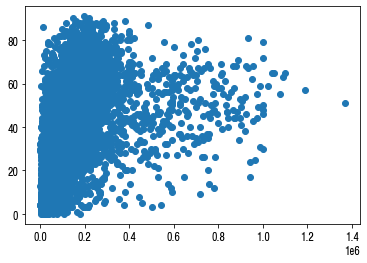

In [41]:
plt.scatter(df_truck_scat.mileage, df_truck_scat.depreciation)

In [42]:
df_truck_scat2 = df_truck[['depreciation','year']]

In [43]:
df_truck_scat2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5946 entries, 9 to 65927
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   depreciation  5946 non-null   int64
 1   year          5946 non-null   int64
dtypes: int64(2)
memory usage: 139.4 KB


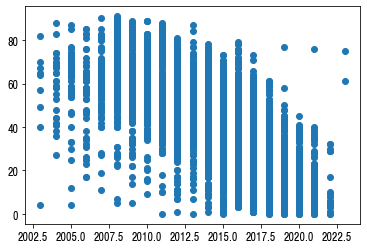

In [44]:
plt.scatter(df_truck_scat2.year, df_truck_scat2.depreciation)

# 1차시도 브랜드명을 기준으로 학습시켜보자(기초)[ 틀린 전처리]

In [45]:
model_df = df[['car_brand','new_price','year','use','mileage','fuel','forecast_min','forecast_max','car_type','color','trans','price']]

In [46]:
model_df['year'] = pd.Categorical(model_df['year'])

C:\Users\ksy94\AppData\Local\Temp/ipykernel_15052/1852111525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['year'] = pd.Categorical(model_df['year'])


In [47]:
model_df = pd.get_dummies(model_df)

In [48]:
model_df.head()

,new_price,use,mileage,forecast_min,forecast_max,price,car_brand_BMW,car_brand_GMC,car_brand_MAN,car_brand_닛산,car_brand_다이하쓰,car_brand_닷지,car_brand_도요타,car_brand_동풍자동차,car_brand_람보르기니,car_brand_랜드로버,car_brand_렉서스,car_brand_로버,car_brand_롤스로이스,car_brand_르노삼성,car_brand_르노코리아,car_brand_링컨,car_brand_마세라티,car_brand_마이바흐,car_brand_마쯔다,car_brand_맥라렌,car_brand_미니,car_brand_미쯔비시,car_brand_벤츠,car_brand_벤틀리,car_brand_볼보,car_brand_사브,car_brand_선롱버스,car_brand_쉐보레,car_brand_스마트,car_brand_스바루,car_brand_스즈키,car_brand_시트로엥,car_brand_쌍용,car_brand_아우디,car_brand_애스턴마틴,car_brand_어큐라,car_brand_이베코,car_brand_인피니티,car_brand_재규어,car_brand_제네시스,car_brand_중한자동차,car_brand_지프,car_brand_캐딜락,car_brand_크라이슬러,car_brand_테슬라,car_brand_페라리,car_brand_포드,car_brand_포르쉐,car_brand_포톤,car_brand_폭스바겐,car_brand_푸조,car_brand_피아트,car_brand_한국GM,car_brand_허머,car_brand_혼다,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,fuel_CNG,fuel_LPG,fuel_가솔린,fuel_가솔린+LPG,fuel_기타,fuel_디젤,fuel_전기,fuel_하이브리드(가솔린),fuel_하이브리드(디젤),car_type_RV,car_type_SUV,car_type_경차,car_type_대형,car_type_버스,car_type_소형,car_type_스포츠카,car_type_승합,car_type_준중형,car_type_중형,car_type_트럭,car_type_특수,color_Firesand Orange,color_Graphite grey,color_Neo블랙,color_Selenite Grey,color_가드메탈릭,color_갈대색,color_갈대투톤,color_갈색,color_갈색(밤색),color_감은,color_감청,color_검붉은색,color_검정,color_검정색,color_검정투톤,color_검쥐색,color_겨자색,color_고동색,color_곤색,color_골드실버,color_군청색,color_그라파이트,color_그레이,color_그레이스풀 그레이,color_그레이스풀그레이,color_금색,color_꽃자주,color_나이트블루메탈릭,color_나이트블루펄,color_남색,color_네이비,color_넵튠블루,color_노란색,color_노랑,color_노랑색,color_노을색,color_녹색,color_녹색투톤,color_다크 블루,color_다크그레이,color_다크베이직,color_다크브라운,color_다크블루,color_다크블루 / 남색,color_다크색,color_다크체리,color_다크크레이,color_담녹,color_담녹색,color_댄디블루,color_댄디블루투톤,color_댄디블루화이트루프,color_딥네이비,color_라이트 블루,color_라이트커피,color_랩핑,color_레버나블루,color_레이싱그린,color_로얄버건디,color_로얄블루,color_마그네틱그레이,color_마르스레드,color_마블그레이,color_맑은하늘색,color_메디터레니언 블루,color_메탈,color_메탈릭 블랙,color_메탈실버,color_명은색,color_모나코핑크,color_목련색,color_무광블랙색상,color_문라이트블루,color_미네랄화이트,color_미색,color_미선택,color_미스틱그레이,color_미스틱와인,color_민트,color_민트색,color_민트색상,color_밀크색,color_밀키베이지,color_바로사 버건디,color_밤색,color_백진주,color_버건디레드,color_버니나그레이,color_베이지,color_베이지랩핑,color_베이지색,color_베이지투톤,color_보라,color_보라색,color_분홍,color_분홍색,color_브라운,color_브리티쉬레이싱그린2,color_브리티시레이싱그린,color_블랙사파이어,color_블랙사파이어에서 빨간색 래핑,color_블루,color_블루스톤,color_블루아이즈,color_블루펄,color_비둘기,color_비둘기색,color_빨간색,color_빨강,color_빨강(주홍),color_빨강색,color_빨강투톤,color_사틴블랙,color_사하라,color_살색,color_삿포로화이트,color_새틴 스틸 그레이,color_샌드그레이,color_샌드베이지,color_소닉티타늄,color_소피스토 그레이,color_소피스토그레이,color_스카이블루,color_스틸 그레이,color_슬릭실버,color_실버애로우,color_썬셋 오렌지,color_아가타레드,color_아루바,color_아메시스트 블랙,color_아메시스트블랙,color_아이보리,color_아이스모카,color_아일랜드블루,color_아틀란티블루,color_아틱그레이,color_아틱레이스블루,color_알파인화이트,color_어두운 밤색,color_어반그레이,color_에스토릴블루,color_엠버브라운색상,color_연갈대색,color_연금색,color_연녹색,color_연두,color_연두색,color_연베이지,color_연분홍,color_연청색,color_연카키투톤,color_연핑크,color_연하늘색,color_연회색,color_오렌지색,color_오스틴옐로우,color_와인,color_와인색,color_우라노그레이,color_울트라실버,color_은비투톤,color_은색,color_은색투톤,color_은하색,color_은회색,color_인기색,color_인기색상,color_인디핑크색,color_임블,color_임페리얼 블루,color_임페리얼블루,color_자주,color_자주색,color_자주투톤,color_적갈색,color_주카로베이지,color_주홍,color_주황색,color_쥐색,color_쥐색투톤,color_쥐회색,color_진갈색,color_진남색,color_진녹,color_진녹색,color_진주,color_진주색,color_진주색랩핑,color_진주투톤,color_진주펄색,color_진청,color_진청색,color_진한 담녹색,color_진회색,color_짙은 브라운,color_청남색,color_청록,color_청보라,color_청색,color_청색(남색),color_청색투톤,color_청옥색,color_청회색,color_초록,color_초록(연두),color_초록색,color_쵸코브라운,color_카멜레온전체랩핑,color_카본메탈,color_카본블랙,color_카키색,color_카키투톤,color_커피색,color_케리비안블루,color_코스믹블루,color_크리스탈블루,color_클라우드 펄,color_클라우드펄,color_탠브라운,color_토네이도그레이,color_티타늄,color_티타늄실버,color_파랑,color_파랑(남색 곤색),color_파랑(남색),color_파랑색,color_파랑색(카본블랙),color_파랑투톤,color_파이토닉블루,color_펄흰색,color_페퍼화이트,color_포르티마오 블

In [49]:
x = model_df.drop(columns=['price'])
columns = x.columns
train_x = x.values
y = model_df[['price']].to_numpy()

In [50]:
scaler = preprocessing.MinMaxScaler()
trans = scaler.fit_transform(train_x)
x = pd.DataFrame(trans)
x.columns = columns

x = x.to_numpy()

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8, random_state=1)

In [52]:
lr = LinearRegression(fit_intercept=True, normalize=True,copy_X = True)
lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [53]:
print(f'train_acc: {lr.score(x_train,y_train)}')

train_acc: 0.9597645799445138


In [54]:
lr.score(x_test,y_test)

-1.77591941595577e+24

# 2차시도 브랜드명 > 국산, 수입형태로 변경, 색상 제외 , 감가상각 예측 LR

In [55]:
model_df2 = df3[['nation','use','mileage','fuel','car_type','trans','depreciation']]

In [56]:
model_df2.head()

,nation,use,mileage,fuel,car_type,trans,depreciation
0,국산,103,131493,LPG,RV,오토,60
1,국산,52,60000,디젤,SUV,오토,27
2,국산,57,133319,가솔린,경차,오토,54
3,국산,48,90000,가솔린,준중형,오토,21
4,국산,131,159474,가솔린,대형,오토,83


In [57]:
model_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65930 entries, 0 to 65929
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   nation        65930 non-null  object
 1   use           65930 non-null  int64 
 2   mileage       65930 non-null  int64 
 3   fuel          65930 non-null  object
 4   car_type      65930 non-null  object
 5   trans         65930 non-null  object
 6   depreciation  65930 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 3.5+ MB


In [58]:
data_set = pd.get_dummies(model_df2, columns = ['nation','fuel','car_type','trans'])

In [59]:
data_set

,use,mileage,depreciation,nation_국산,nation_수입,fuel_CNG,fuel_LPG,fuel_가솔린,fuel_가솔린+LPG,fuel_기타,fuel_디젤,fuel_전기,fuel_하이브리드(LPG),fuel_하이브리드(가솔린),fuel_하이브리드(디젤),car_type_RV,car_type_SUV,car_type_경차,car_type_대형,car_type_버스,car_type_소형,car_type_스포츠카,car_type_승합,car_type_준중형,car_type_중형,car_type_트럭,car_type_특수,trans_CVT,trans_SAT,trans_기타,trans_수동,trans_오토
0,103,131493,60,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,52,60000,27,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,57,133319,54,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,48,90000,21,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,131,159474,83,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65925,110,59721,54,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
65926,182,76800,56,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
65927,118,97188,36,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
65928,142,174500,89,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [60]:
data_set.columns[:3]

Index(['use', 'mileage', 'depreciation'], dtype='object')

In [61]:
feature = data_set.columns[:3]

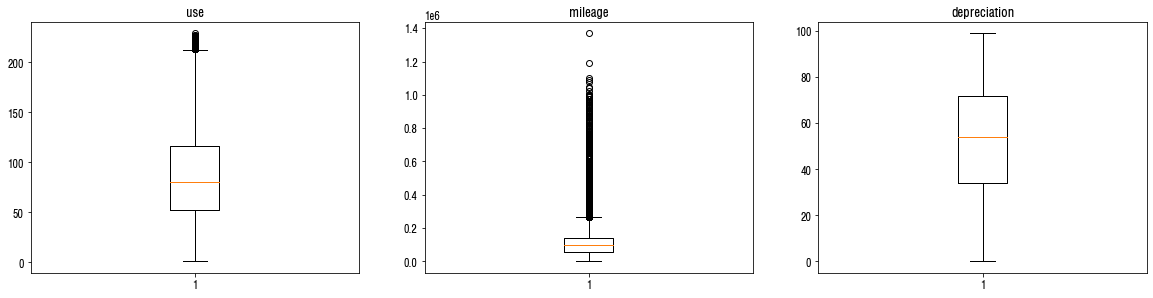

In [62]:
plt.figure(figsize=(20,60))

for i in range(len(feature)):
    plt.subplot(11,3,i+1)
    plt.title(feature[i])
    plt.boxplot(data_set[feature[i]])
plt.show()

In [63]:
data_x = data_set.drop(['depreciation'],axis=1)
data_y = data_set.depreciation

In [64]:
data_x.shape

(65930, 31)

In [65]:
data_y.shape

(65930,)

In [66]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_x,data_y, test_size = 0.25)

In [67]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

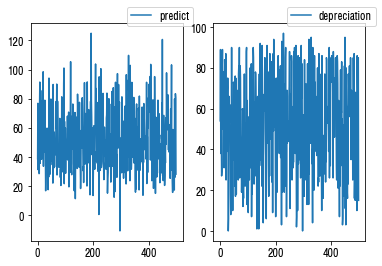

In [68]:
plt.subplot(1,2,1)
plt.plot(lr.predict(x_test[:500]), label="predict")
plt.legend(bbox_to_anchor=(1.1,1.1))

plt.subplot(1,2,2)
plt.plot(y_test[:500].values.reshape(-1, 1), label="depreciation")
plt.legend(bbox_to_anchor=(1.1,1.1))

In [69]:
print(lr.score(x_train, y_train))

0.7855032317342959


In [70]:
print(lr.score(x_test,y_test))

0.7908395183201695


In [71]:
y_pred_lr = lr.predict(x_test)
pred_lr = [round(value) for value in y_pred_lr]

In [72]:
from sklearn.metrics import accuracy_score

# 2차시도와 동일 데이터값 사용 XGBoost Regression

In [73]:
#pip install xgboost

In [74]:
from xgboost import XGBClassifier

In [75]:
x_train, x_test, y_train, y_test = train_test_split(data_x,data_y, test_size = 0.25)

In [76]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

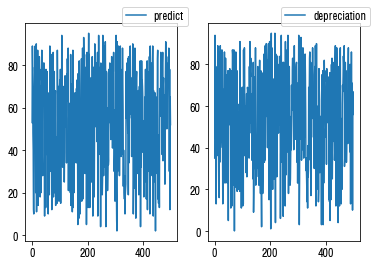

In [77]:
plt.subplot(1,2,1)
plt.plot(xgb.predict(x_test[:500]), label="predict")
plt.legend(bbox_to_anchor=(1.1,1.1))

plt.subplot(1,2,2)
plt.plot(y_test[:500].values.reshape(-1, 1), label="depreciation")
plt.legend(bbox_to_anchor=(1.1,1.1))

In [78]:
print(xgb.score(x_train, y_train))

0.4779258600117297


In [79]:
print(xgb.score(x_test, y_test))

0.05187162531092641
